# Optimización unidimensional

In [1]:
from sympy import symbols, pi, solve

r, h, V_0 = symbols("r h V_0")
Area = 2 * pi * r**2 + 2 * pi * r * h
Volumen = pi * r**2 * h
h_r = solve(Volumen - V_0, h)[0] # hallamos h en función de r
Area_r = Area.subs({h: h_r})     # expresamos el área como función de r
r_sol = solve(Area_r.diff(r), r)[0] # solución de r con significado físico
r_sol

2**(2/3)*V_0**(1/3)/(2*pi**(1/3))

In [2]:
print(Area_r.diff(r, 1).subs(r, r_sol), Area_r.diff(r, 2).subs(r, r_sol))

0 12*pi


In [3]:
Area_r.subs(r, r_sol)

3*2**(1/3)*pi**(1/3)*V_0**(2/3)

In [4]:
r_sol.subs({V_0: 1}).evalf()

0.541926070139289

In [5]:
import numpy as np
from scipy.optimize import minimize_scalar

def f(r):
    return 2 * np.pi * r**2 + 2 / r

solucion = minimize_scalar(f, bracket=[0.01, 1], method='brent')
print(solucion)
print(f"r_min = {solucion.x}")

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 5.535810445932086
       x: 0.5419260710334868
     nit: 12
    nfev: 15
r_min = 0.5419260710334868


# Optimización multidimensional

In [6]:
x1, x2, x, y = symbols("x_1 x_2 x y")
f_sim = (x1**4 - 16 * x1**2 + 5 * x1) / 2 + (x2**4 - 16 * x2**2 + 5 * x2) / 2
f_d1 = [f_sim.diff(x_) for x_ in (x1, x2)]

In [7]:
from sympy import Matrix

# Gradiente:
Matrix(f_d1)

Matrix([
[2*x_1**3 - 16*x_1 + 5/2],
[2*x_2**3 - 16*x_2 + 5/2]])

In [8]:
f_hess = [[f_sim.diff(x, y) for x in (x1, x2)] for y in (x1, x2)]

In [9]:
# Hessiano:
Matrix(f_hess)

Matrix([
[2*(3*x_1**2 - 8),                0],
[               0, 2*(3*x_2**2 - 8)]])

In [10]:
from sympy import lambdify

f_num = lambdify((x1, x2), f_sim, 'numpy')
f_d1_num = lambdify((x1, x2), f_d1, 'numpy')
f_hess_num = lambdify((x1, x2), f_hess, 'numpy')

In [11]:
def func_XY_a_X_Y(f):
    return lambda X: np.array(f(X[0], X[1]))

f = func_XY_a_X_Y(f_num)
f1 = func_XY_a_X_Y(f_d1_num)
fh = func_XY_a_X_Y(f_hess_num)

In [12]:
from scipy.optimize import minimize

solucion = minimize(f, (1, 1), method='Newton-CG', jac=f1, hess=fh)
solucion

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -50.058893310567896
       x: [ 2.747e+00  2.747e+00]
     nit: 4
     jac: [ 2.301e-04  2.301e-04]
    nfev: 7
    njev: 7
    nhev: 4

In [13]:
f(solucion.x)

array(-50.05889331)

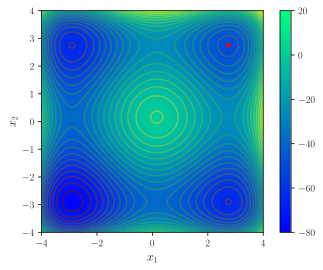

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(6, 4))
xLim = yLim = 4
x = y = np.linspace(-xLim, xLim, 100)
X, Y = np.meshgrid(x, y)
x_min = solucion.x
palette = plt.cm.winter
im=ax.imshow(f_num(X, Y), extent=[-xLim, xLim, -yLim, yLim], 
          cmap=palette, norm=colors.Normalize(vmin=-80.0, vmax=20),
          origin='lower')
c = ax.contour(X, Y, f_num(X, Y), 30)
ax.plot(x_min[0], x_min[1], 'r*', markersize=5)
ax.set_xlabel(r"$x_1$", fontsize=12)
ax.set_ylabel(r"$x_2$", fontsize=12)
plt.colorbar(im, ax=ax)
plt.show()

In [15]:
sol_bfgs = minimize(f, (1, 1), method='BFGS')
sol_bfgs

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -50.058893310566276
        x: [ 2.747e+00  2.747e+00]
      nit: 6
      jac: [-6.676e-06 -6.676e-06]
 hess_inv: [[ 4.741e-01 -4.802e-01]
            [-4.802e-01  5.582e-01]]
     nfev: 33
     njev: 11

In [16]:
sol_cg = minimize(f, (1, 1), method='CG', jac=f1)
sol_cg

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -50.05889331056788
       x: [ 2.747e+00  2.747e+00]
     nit: 5
     jac: [-2.170e-09 -2.170e-09]
    nfev: 17
    njev: 16

In [17]:
from scipy.optimize import brute

sol_ini = brute(f, (slice(-5, 5, 0.5), slice(-5, 5, 0.5)), finish=None)
sol_ini

array([-3., -3.])

In [18]:
f(sol_ini)

array(-78.)

In [19]:
sol_bfgs_g = minimize(f, sol_ini, method='BFGS')
sol_bfgs_g

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -78.33233140754265
        x: [-2.904e+00 -2.904e+00]
      nit: 3
      jac: [-1.907e-06 -1.907e-06]
 hess_inv: [[ 5.145e-01 -4.855e-01]
            [-4.855e-01  5.145e-01]]
     nfev: 15
     njev: 5

# Restricción en las variables de decisión

In [20]:
def f_ros(X):
    x1, x2 = X
    a, b = 1, 1
    return (a - x1)**2 + b * (x2 - x1**2)**2

x0 = [0, 0]
res_opt = minimize(f_ros, x0, method='BFGS')
bnd_x1, bnd_x2 = (2, 3), (0, 2)
res_opt_bnd = minimize(f_ros, x0, method='L-BFGS-B', 
                    bounds=[bnd_x1, bnd_x2])
print(f"Sin restricción: f = {res_opt.fun} en x = {res_opt.x}")
print(f"Con restricción: f = {res_opt_bnd.fun} en x = {res_opt_bnd.x}")

Sin restricción: f = 2.9986375725184793e-15 en x = [0.99999995 0.99999991]
Con restricción: f = 5.0 en x = [2. 2.]


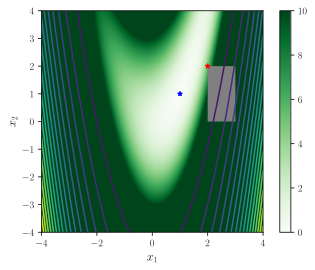

In [21]:
def f_ros_p(x, y):
    return f_ros((x, y))

fig, ax = plt.subplots(figsize=(6, 4))
xLim = yLim = 4
x = y = np.linspace(-xLim, xLim, 200)
X, Y = np.meshgrid(x, y)
palette = plt.cm.Greens
im=ax.imshow(f_ros_p(X, Y), extent=[-xLim, xLim, -yLim, yLim], 
          cmap=palette, norm=colors.Normalize(vmin=-0.0, vmax=10),
          origin='lower')
c = ax.contour(X, Y, f_ros_p(X, Y), 20)
ax.plot(res_opt.x[0], res_opt.x[1], 'b*', markersize=5)
ax.plot(res_opt_bnd.x[0], res_opt_bnd.x[1], 'r*', markersize=5)
bound_zone = plt.Rectangle((bnd_x1[0], bnd_x2[0]),
                           bnd_x1[1] - bnd_x1[0],
                           bnd_x2[1] - bnd_x2[0],
                           facecolor='gray')
ax.add_patch(bound_zone)
ax.set_xlabel(r"$x_1$", fontsize=12)
ax.set_ylabel(r"$x_2$", fontsize=12)
plt.colorbar(im, ax=ax)
plt.show()

# Programación lineal

In [22]:
c = [0.82, 0.5, 0.4]
A = [[-1, -7, -2], [-4, -2, -2], [-3, -2, 0]]
b = [-10, -15, -6]
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)

In [23]:
from scipy.optimize import linprog

res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds, x1_bounds])
print(f"Valor de f: {res.fun}, en x = {res.x}")
print(f"c . x = {c @ res.x}")

Valor de f: 3.052380952380952, en x = [1.9047619  0.14285714 3.54761905]
c . x = 3.0523809523809526


In [24]:
res

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 3.052380952380952
              x: [ 1.905e+00  1.429e-01  3.548e+00]
            nit: 3
          lower:  residual: [ 1.905e+00  1.429e-01  3.548e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00  0.000e+00]
                 marginals: [-1.238e-02 -1.876e-01 -1.905e-02]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

# Programación no lineal

In [25]:
def g(X):
    x1, x2 = X
    return x1**2 + x2**2 - 1

constrain = dict(type='eq', fun=g)

In [26]:
res = minimize(f_ros, x0, method='SLSQP', constraints=[constrain])
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.04091903706230661
       x: [ 8.082e-01  5.889e-01]
     nit: 8
     jac: [-1.762e-01 -1.284e-01]
    nfev: 33
    njev: 8

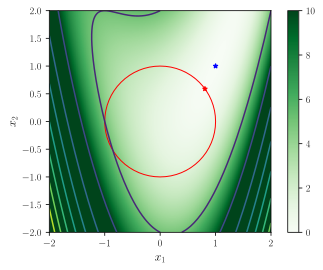

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))
xLim = yLim = 2
x = y = np.linspace(-xLim, xLim, 200)
X, Y = np.meshgrid(x, y)
palette = plt.cm.Greens
im=ax.imshow(f_ros_p(X, Y), extent=[-xLim, xLim, -yLim, yLim], cmap=palette, 
             norm=colors.Normalize(vmin=-0.0, vmax=10), origin='lower')
c = ax.contour(X, Y, f_ros_p(X, Y), 10)
circle = plt.Circle( (0, 0), 1, fill=False, color='red')
ax.add_artist(circle)
ax.plot(res_opt.x[0], res_opt.x[1], 'b*', markersize=5)
ax.plot(res.x[0], res.x[1], 'r*', markersize=5)
ax.set_xlabel(r"$x_1$", fontsize=12)
ax.set_ylabel(r"$x_2$", fontsize=12)
plt.colorbar(im, ax=ax)
plt.show()


### Copyright 2020-2025 Facundo Batista y Manuel Carlevaro

Licencia CC BY-NC-SA 4.0

Para más info visitar: https://github.com/facundobatista/libro-pyciencia/

